In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
#loading the dataset
data = pd.read_excel('/content/toughestsport.xlsx')
data.head()

,SPORT,END,STR,PWR,SPD,AGI,FLX,NER,DUR,HAN,ANA,TOTAL,RANK
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


In [ ]:
#changing column names
new_names = ['SPORT', 'ENDURANCE', 'STRENGTH', 'POWER', 'SPEED', 'AGILITY',
       'FLEXIBILITY', 'NERVE', 'DURABILITY', 'HAND/EYE', 'ANALYTIC APT',
       'TOTAL', 'RANK']

data.columns = new_names
data

,SPORT,ENDURANCE,STRENGTH,POWER,SPEED,AGILITY,FLEXIBILITY,NERVE,DURABILITY,HAND/EYE,ANALYTIC APT,TOTAL,RANK
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5
5,Martial Arts,5.00,5.88,7.75,6.38,6.00,7.00,6.63,5.88,6.00,6.88,63.375,6
6,Tennis,7.25,5.13,7.13,6.75,7.75,5.63,3.00,5.00,8.38,6.75,62.750,7
7,Gymnastics,5.38,6.13,6.63,5.00,6.38,10.00,7.50,6.88,4.50,4.13,62.500,8
8,Baseball/Softball,4.63,5.75,7.63,6.50,6.75,4.75,5.13,5.63,9.25,6.25,62.250,9
9,Soccer,7.75,4.50,5.13,7.25,8.25,4.75,3.63,6.25,6.50,7.50,61.500,10


In [ ]:
data.isnull().sum()

SPORT           0
ENDURANCE       0
STRENGTH        0
POWER           0
SPEED           0
AGILITY         0
FLEXIBILITY     0
NERVE           0
DURABILITY      0
HAND/EYE        0
ANALYTIC APT    0
TOTAL           0
RANK            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SPORT         60 non-null     object 
 1   ENDURANCE     60 non-null     float64
 2   STRENGTH      60 non-null     float64
 3   POWER         60 non-null     float64
 4   SPEED         60 non-null     float64
 5   AGILITY       60 non-null     float64
 6   FLEXIBILITY   60 non-null     float64
 7   NERVE         60 non-null     float64
 8   DURABILITY    60 non-null     float64
 9   HAND/EYE      60 non-null     float64
 10  ANALYTIC APT  60 non-null     float64
 11  TOTAL         60 non-null     float64
 12  RANK          60 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 6.2+ KB


In [ ]:
data.describe()

,ENDURANCE,STRENGTH,POWER,SPEED,AGILITY,FLEXIBILITY,NERVE,DURABILITY,HAND/EYE,ANALYTIC APT,TOTAL,RANK
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.077667,5.169000,5.509167,4.815000,4.765000,4.723167,4.614833,4.612833,4.954833,4.767333,48.983333,30.400000
std,2.094217,1.715357,1.980397,2.266403,1.927273,1.704369,2.442645,1.882102,1.966328,1.576830,12.170519,17.473661
min,1.000000,1.000000,1.250000,0.630000,1.000000,1.130000,0.880000,0.750000,1.880000,2.250000,14.500000,1.000000
25%,3.500000,3.880000,4.097500,3.000000,3.437500,3.847500,2.597500,3.380000,3.130000,3.437500,44.093750,15.750000
50%,4.630000,5.190000,5.690000,5.130000,4.755000,4.750000,4.190000,4.630000,4.440000,4.250000,48.000000,30.000000
75%,6.660000,6.130000,7.130000,6.410000,6.380000,5.532500,6.532500,5.782500,6.630000,6.160000,56.031250,45.250000
max,9.630000,9.250000,9.750000,9.880000,8.250000,10.000000,9.880000,8.500000,9.250000,7.500000,72.375000,60.000000


<ipython-input-54-42a55e416a09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 1.0, 'Data Correlation')

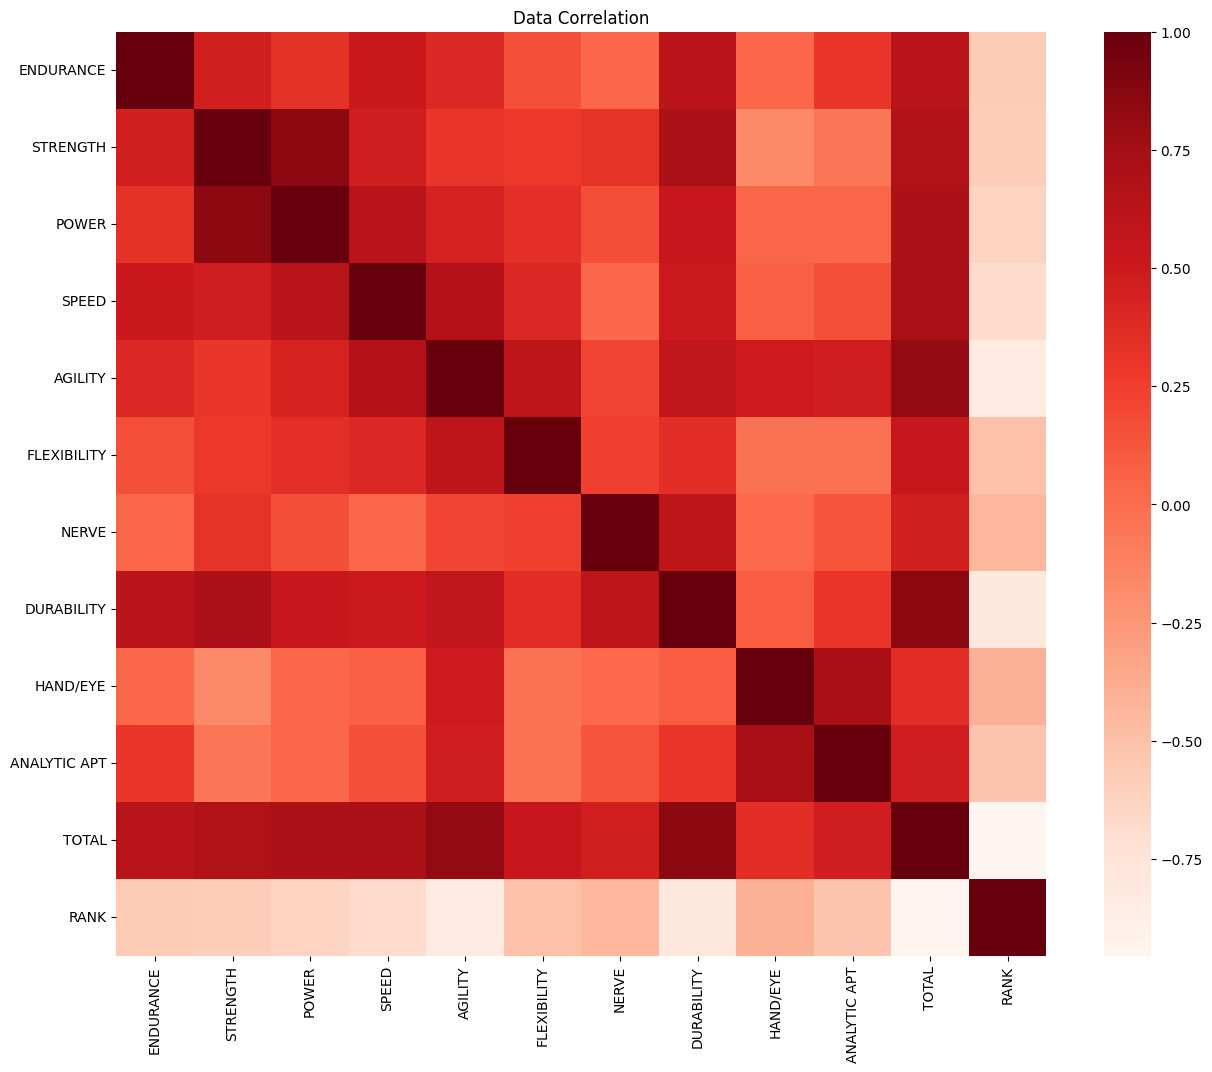

In [ ]:
#correlation plot
corr = data.corr()
fig = plt.figure(figsize=(15,12))
a = sns.heatmap(corr, cmap='Reds')
a.set_title("Data Correlation")

In [ ]:
threshold_tough = 25  #setting threshold
#binary target variable based on the threshold
data['Tough'] = np.where(data['RANK'] <= threshold_tough, 1, 0)

In [ ]:
data['Tough']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
Name: Tough, dtype: int64

In [ ]:
#creating y and x
y = data['Tough']
X = data.drop(['Tough', 'RANK', 'SPORT'], axis=1)

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)

In [ ]:
#model building
svc = SVC(kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
#prediction
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

Accuracy Score: 1.0
